# An analysis of the influence of Black Southern Churches on the Southern Black Community

## Background:

Documenting the American South is one of the longest running digital publishing initiatives at the University of North Carolina. It was designed to give researchers digital access to some of the library’s unique collections in the form of high quality page scans as well as structured, corrected and machine readable text. (https://docsouth.unc.edu/docsouthdata/)

## Goal: 

Analyze rhetoric of the Black Southern Church in the American South and it's effects on documents written by self emancipated and previously enslaved Black people.

## Research question:

Are there any measurable similaries between the themes of documents from Southern Black churches and the documents from self-emancipated and freed Black people? 

## Approach:

[Documenting The American South](https://docsouth.unc.edu/) is one of the longest running efforts by the University of North Carolina to collect, digitize, and publish documents from self-emancipated and freed Black people. Using [DocSouth Data](https://docsouth.unc.edu/docsouthdata/) and data from the [Religious Text Content Guide](https://docsouth.unc.edu/neh/religiouscontent.html), analyze the correlation between autobiographies, biographies, church documents, sermons, histories, encyclopedias, and other published materials from Southern Black churches and the narratives of slaves in regards to religion.

Proposed analysis:

- Evaluate language of both data sets
- Evaluate themes of both data sets
- Using data from the [Religious Text Content Guide](https://docsouth.unc.edu/neh/religiouscontent.html), develop a theme predictor for texts
- Evaluate how much (if any) thematic overlap there is between religious texts and slave narratives

## Repo contents:
- [SouthernBlackChurchRhetoric](https://github.com/jaded-gloryy/doc-south-analysis/blob/main/SouthernBlackChurchRhetoric.ipynb) contains all analysis.
- [Scrape_website](https://github.com/jaded-gloryy/doc-south-analysis/blob/main/scrape_website.py) contains the functions used to obtain [Religious Text Content Guide](https://docsouth.unc.edu/neh/religiouscontent.html) data.
- [Utils](https://github.com/jaded-gloryy/doc-south-analysis/blob/main/utils.py) contains generic functions for parsing an html document.


data: 
https://www.kaggle.com/datasets/docsouth-data/the-church-in-the-southern-black-community
https://docsouth.unc.edu/neh/religiouscontent.html

note from kaggle compiler:
If you make use of this data, considering letting the holder of the original collection know how you are using the data and if you have any suggestions for making it even more useful. Send any feedback to wilsonlibrary@unc.edu.

### Data preprocessing

##### Get content guide data

Data was scraped from [religious text content guide data](https://docsouth.unc.edu/neh/religiouscontent.html).

In [3]:
# import data scraped from the web and turn it into a df
from scrape_website import scrape_data, custom_filter, build_dict
url = "https://docsouth.unc.edu/neh/religiouscontent.html"
tag_list = scrape_data(url=url, filter=custom_filter)
data_dict = build_dict(tag_list=tag_list)
content_guide_data = df.from_dict(data_dict)
content_guide_data = content_guide_data.dropna(subset="page_link")
content_guide_data

,theme,alt_theme,author,title,year,page_numbers,page_link
0,Baptism,None,"Brown, Henry Box, and Charles Stearn",Narrative of Henry Box Brown,1849,23-24,/neh/boxbrown/boxbrown.html#p23
1,Baptism,None,"Brown, Josephine",Biography of an American Bondman,"1856, c1855",23-24,/neh/brownj/brownj.html#brownj23
2,Baptism,None,"Brown, Rebecca Warren[?]",Memoir of Mrs. Chloe Spear,1832,38-40,/neh/brownrw/brownrw.html#spear38
3,Baptism,None,"Henry, George",Life of George Henry,1894,42-43,/neh/henryg/henryg.html#henry42
4,Baptism,None,"Johnson, Thomas Lewis",Twenty-Eight Years a Slave,1909,17,/neh/johnson1/johnson.html#john17
...,...,...,...,...,...,...,...
388,Spirituals,None,"Capehart, L. C.",Reminiscences of Isaac and Sukey,1907,11,/neh/capehart/capehart.html#cape11
389,Spirituals,None,"Foster, G. L. (Gustavus Lemuel)",Uncle Johnson,"Foster, G. L. (Gustavus Lemuel",70-71,/neh/foster/foster.html#foster70
390,Spirituals,None,"Jones, Friday",Days of Bondage,1883,17-18,/neh/fjones/jones.html#jones17
391,Spirituals,None,"Pickard, Kate E. R.",The Kidnapped and the Ransomed,1856,179-180,/neh/pickard/pickard.html#pickard179


#### Get text data from the documents in the content guide

##### The next 3 cells contain code to grab text from specific pages of each document in the content_guide_data.

The output of the code below is saved in thematic_text.txt. Since this only needs to be performed once, the code is commented out.

In [17]:
# get text files from links in page column
# from scrape_website import combine_url,get_pages_from_url, get_page_list
# base_url = "https://docsouth.unc.edu"
# #replace roman numeral ranges
# content_guide_data = content_guide_data.replace({"page_numbers":{"iv-viii":"iv,v,vi,vii,viii", "vi-viii":"vi,vii,viii"}})
# page_numbers = content_guide_data["page_numbers"]
# page_urls = content_guide_data["page_link"]

# full_links = combine_url(base_url=base_url, specific_url=list(page_urls))
# page_num_list = list(page_numbers)

# # get a list of pages
# page_ranges = []
# for page in page_num_list:
#     page_ranges.append(get_page_list(page))

# thematic_texts = get_pages_from_url(urls=full_links, pages=page_ranges)

# with open('thematic_text.txt', 'w') as f:
#     for line in thematic_texts:
#         f.write(line)
#         f.write("\n")

The output of the code below is saved in cleaned_thematic_text.txt. Since this only needs to be performed once, the code is commented out.

In [7]:
# clean up and save output to a txt for future use
# from scrape_website import clean_up_text
# cleaned_thematic_texts = []
# for text in thematic_texts:
#     new_text = clean_up_text(text)
#     cleaned_thematic_texts.append(new_text)

# save cleaned text to a txt file
# with open('cleaned_thematic_text.txt', 'w') as f:
#     for line in cleaned_thematic_texts:
#         f.write(line)
#         f.write("\n")
# cleaned_thematic_texts

In [31]:
# reading in data from txt
ctt = open("cleaned_thematic_text.txt", "r")
data = ctt.read()
  
# replacing end splitting the text 
# when newline ('\n') is seen.
data_into_list = data.split("\n")
len(data_into_list)
#removing the last empty line
thematic_texts = data_into_list[:388]
ctt.close()


#### Read in table of contents data

The following code prepares DocSouth general data for analysis.

In [29]:
import pandas as pd
from pandas import DataFrame as df
from  config import CONFIG

#read in toc table
#replace .xml with .txt for filenames
# remove anything in [] from txt files
toc_data = CONFIG["TOC_FILEPATH"]
contents_table = pd.read_csv(toc_data)
txt_filename = contents_table.Filename.str.replace(".xml", ".txt")

# get every entry, drop .xml and replace it with .txt
contents_table["txt_filename"] = txt_filename

# make new table
specified_content_cols = ["txt_filename", "Date", "Author", "Title"]
content_ref_table = contents_table[specified_content_cols]

/var/folders/18/918s5vr16kl9091zgnswr5gm0000gn/T/ipykernel_10246/841495044.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  txt_filename = contents_table.Filename.str.replace(".xml", ".txt")


In [30]:
# rename date column and lower other col names
content_ref_table = content_ref_table.rename(columns={"Date":"year"})
content_ref_table.columns = content_ref_table.columns.str.lower()
content_ref_table

,txt_filename,year,author,title
0,church-ridgel-ridgel.txt,1896,Alfred Lee Ridgel,Africa and African Methodism
1,church-bowen-bowen.txt,1896,J. W. E. Bowen,Africa and the American Negro: Addresses and P...
2,neh-johnsontl-johnsontl.txt,1892,Thomas L. Johnson,Africa for Christ. Twenty-Eight Years a Slave
3,church-turneral-turner.txt,1893,Henry McNeal Turner,African Letters
4,church-gaineswj-gaines.txt,1890,W. J. Gaines,"African Methodism in the South; or, Twenty-Fiv..."
...,...,...,...,...
139,church-wheeler-wheeler.txt,1906,B. F. Wheeler,The Varick Family
140,church-cooper-cooper.txt,1892,Anna J. Cooper,A Voice from the South
141,neh-wilkerson-wilkerson.txt,1861,Major James Wilkerson,Wilkerson's History of His Travels &amp; Labor...
142,church-brawley-brawley.txt,c1919,Benjamin Griffith Brawley,Women of Achievement: Written for the Fireside...


### Thematic text analysis

In [47]:
# tokenize texts
# combine relevant content data with texts
from pandas import DataFrame as df
thematic_data_df = content_guide_data[["theme","title"]].reset_index(drop=True)
them_df= df(thematic_texts, columns=["text"])
new_df = pd.concat([thematic_data_df,them_df],axis=1)
new_df

,theme,title,text
0,Baptism,Narrative of Henry Box Brown,slavery is dissolved. The slave's wife is ...
1,Baptism,Biography of an American Bondman,"Haskell, the overseer, experien..."
2,Baptism,Memoir of Mrs. Chloe Spear,"herself entirely alone, she fell on her ..."
3,Baptism,Life of George Henry,to bind all that called upon the name of...
4,Baptism,Twenty-Eight Years a Slave,But now I thought that if my master would...
...,...,...,...
383,Spirituals,Reminiscences of Isaac and Sukey,Sukey Bat Moore on the Art of Flying. ...
384,Spirituals,Uncle Johnson,charm. They would come forth as spontane...
385,Spirituals,Days of Bondage,on Tuesday morning--this was Sunday nigh...
386,Spirituals,The Kidnapped and the Ransomed,"you to go to the gin-house, and get Ann ..."


In [52]:
# themes pre-analysis
themes = new_df["theme"]
themes.value_counts()

Religious practice                                                                                          48
Religious experience, positive                                                                              32
Literacy:  includes learning to read and write, further education, and experiences related to literacy      31
Conversion experience                                                                                       28
Spirituals                                                                                                  24
Sabbath, slaves' observance                                                                                 23
Bible                                                                                                       21
Condemnation of masters                                                                                     19
Marriage                                                                                                    19
M

<AxesSubplot:title={'center':'Themes by count'}, xlabel='Theme', ylabel='Count'>

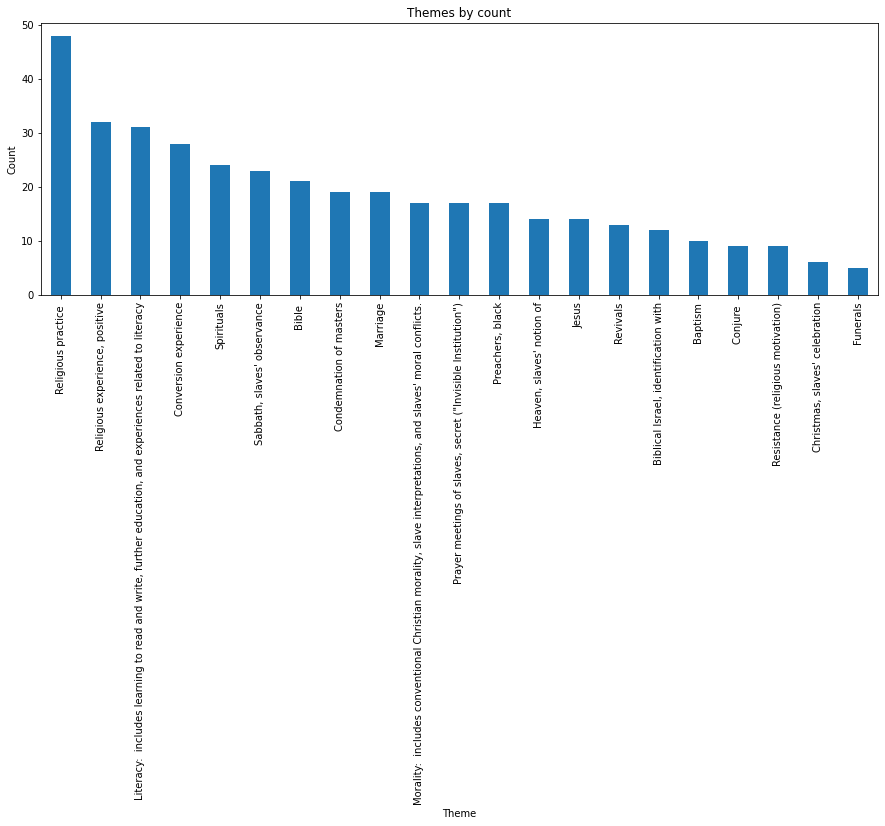

In [61]:
#get hist of themes
# themes.hist(xrot=90,figsize=[15,5],bins=len(themes.unique()), align="mid")
themes.value_counts().plot(kind='bar', xlabel='Theme', ylabel='Count', rot=90, figsize=[15,5], title="Themes by count" )